In [1]:
import tifffile as tf
from scipy import ndimage

import numpy as np
import pandas as pd
import numpy.polynomial.polynomial as P

import os

import glob
from importlib import reload

import warnings
warnings.filterwarnings( "ignore")
from matplotlib import pyplot as plt
%matplotlib inline

import walnut_utils as wnut

In [36]:
src = '../hpcc/'
wsrc = src + 'clean/'
tsrc = src + 'watershed/'
dst = '../figs/'
idname = '2014SBa'
rownum = 5
treenum = 48
nutnum = 9

bname = idname + '_R{}_T{}'.format(rownum, treenum)
fname = bname + '_{:03d}'.format(nutnum)
print(fname)

wdst = dst + bname + '/'
if not os.path.isdir(wdst):
    os.makedirs(wdst)
print(wdst)

2014SBa_R5_T48_009
../figs/2014SBa_R5_T48/


In [37]:
img = tf.imread(wsrc + bname + '/' + fname + '.tif')
tissuefiles = tsrc + bname + '/' + fname + '_'
air  = tf.imread(tissuefiles + 'air.tif')
meat = tf.imread(tissuefiles + 'meat.tif')
shell= tf.imread(tissuefiles + 'shell.tif')
vein = tf.imread(tissuefiles + 'vein.tif')
#protrusion = tf.imread(tissuefiles + 'protrusion.tif')

watershed = np.zeros_like(img)
watershed[img > 0] = 3
watershed[meat > 0] += 1
watershed[shell > 0] += 2
watershed[vein > 0] += 3
watershed[air > 0] += 4
watershed.max()

N = 49
xx = np.linspace(5,img.shape[0]-5,N).astype(np.uint)
yy = np.linspace(5,img.shape[1]-5,N).astype(np.uint)
zz = np.linspace(5,img.shape[2]-5,N).astype(np.uint)

# Go-through slices

In [6]:
fs = 25
k = 150

for k in range(N):
    ss = np.s_[xx[k],:,:]

    fig, ax = plt.subplots(1,5,figsize=(16,4), sharex=True, sharey=True, facecolor='k')
    ax = np.atleast_1d(ax).flatten()

    i = 0
    ax[i].imshow(img[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(watershed[ss], cmap='magma', origin='lower', vmax=7, vmin=0); i += 1
    ax[i].imshow(shell[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(meat[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(vein[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1

    for i in range(len(ax)):
        ax[i].axis('off')

    fig.suptitle(fname + ' (X plane)', fontsize=fs, color='w')
    fig.tight_layout()

    filename = wdst + fname + '_x_{:04d}'.format(k)
    plt.savefig(filename + '.jpg', format='jpg', bbox_inches='tight', dpi=72, pil_kwargs={'optimize':True})
    plt.close()
    
    ss = np.s_[:,yy[k],:]

    fig, ax = plt.subplots(1,5,figsize=(16,4), sharex=True, sharey=True, facecolor='k')
    ax = np.atleast_1d(ax).flatten()

    i = 0
    ax[i].imshow(img[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(watershed[ss], cmap='magma', origin='lower', vmax=7, vmin=0); i += 1
    ax[i].imshow(shell[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(meat[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(vein[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1

    for i in range(len(ax)):
        ax[i].axis('off')

    fig.suptitle(fname + ' (Y plane)', fontsize=fs, color='w')
    fig.tight_layout()

    filename = wdst + fname + '_y_{:04d}'.format(k)
    plt.savefig(filename + '.jpg', format='jpg', bbox_inches='tight', dpi=72, pil_kwargs={'optimize':True})
    plt.close()
    
    ss = np.s_[:,:,zz[k]]

    fig, ax = plt.subplots(1,5,figsize=(16,4), sharex=True, sharey=True, facecolor='k')
    ax = np.atleast_1d(ax).flatten()

    i = 0
    ax[i].imshow(img[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(watershed[ss], cmap='magma', origin='lower', vmax=7, vmin=0); i += 1
    ax[i].imshow(shell[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(meat[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(vein[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1

    for i in range(len(ax)):
        ax[i].axis('off')

    fig.suptitle(fname + ' (Z plane)', fontsize=fs, color='w')
    fig.tight_layout()

    filename = wdst + fname + '_z_{:04d}'.format(k)
    plt.savefig(filename + '.jpg', format='jpg', bbox_inches='tight', dpi=72, pil_kwargs={'optimize':True})
    plt.close()

In [38]:
fs = 21
k = 35

for k in range(len(xx)):
    fig, ax = plt.subplots(3,5,figsize=(16,10), sharex=False, sharey=False, facecolor='k')
    ax = np.atleast_1d(ax).flatten()
    
    i = 0
    ss = np.s_[xx[k],:,:]
    ax[i].imshow(img[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(watershed[ss], cmap='magma', origin='lower', vmax=7, vmin=0); i += 1
    ax[i].imshow(shell[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(meat[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(vein[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1

    ss = np.s_[:,yy[k],:]
    ax[i].imshow(img[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(watershed[ss], cmap='magma', origin='lower', vmax=7, vmin=0); i += 1
    ax[i].imshow(shell[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(meat[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(vein[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1

    ss = np.s_[:,:,zz[k]]
    ax[i].imshow(img[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(watershed[ss], cmap='magma', origin='lower', vmax=7, vmin=0); i += 1
    ax[i].imshow(shell[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(meat[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1
    ax[i].imshow(vein[ss], cmap='inferno', origin='lower', vmax=255, vmin=0); i += 1

    for i in range(len(ax)):
        ax[i].get_xaxis().set_ticks([])
        ax[i].get_yaxis().set_ticks([])
        for spine in ax[i].spines.values():
            spine.set_visible(False)
        ax[i].set_aspect('equal')

    ax[ 0].set_ylabel('X plane', color='w', fontsize=fs)
    ax[ 5].set_ylabel('Y plane', color='w', fontsize=fs)
    ax[10].set_ylabel('Z plane', color='w', fontsize=fs)

    ax[10].set_xlabel('Whole', color='w', fontsize=fs)
    ax[11].set_xlabel('Watershed', color='w', fontsize=fs)
    ax[12].set_xlabel('Shell', color='w', fontsize=fs)
    ax[13].set_xlabel('Kernel', color='w', fontsize=fs)
    ax[14].set_xlabel('Packing', color='w', fontsize=fs)

    fig.suptitle(fname, fontsize=25, color='w')
    fig.tight_layout()

    filename = wdst + fname + '_w_{:04d}'.format(k)
    plt.savefig(filename + '.jpg', format='jpg', bbox_inches='tight', dpi=72, pil_kwargs={'optimize':True})
    plt.close()

# Manuscript composition

In [76]:
wdstn = '../hpcc/clean/' + bname + '/normalization/'

zerofile = wdstn + 'clean_zeroes{:03d}.csv'.format(nutnum)
print(zerofile)
cero = np.loadtxt(zerofile, dtype=int)
print(cero)

coeffile = wdstn + 'normalization_coefficients{:03d}.csv'.format(nutnum)
print(coeffile)
npz = P.Polynomial(np.loadtxt(coeffile))
print(npz)

../hpcc/clean/2011SBb_R3_T60/normalization/clean_zeroes004.csv
[  5   7  18 476 552 467]
../hpcc/clean/2011SBb_R3_T60/normalization/normalization_coefficients004.csv
poly([-11.0243499    2.59862859])


In [78]:
raw = tf.imread('../raw/redo/' + fname + '.tif')//256
raw = raw.astype(np.uint8)
raw = raw[cero[1]:cero[4], cero[2]:cero[5], cero[0]:cero[3]]

In [79]:
bary = np.zeros_like(img[:,0,:])
bary[-20:-5, 300:400] = 255

In [80]:
norm = raw.copy()
norm = wnut.normalize_density(norm, npz)

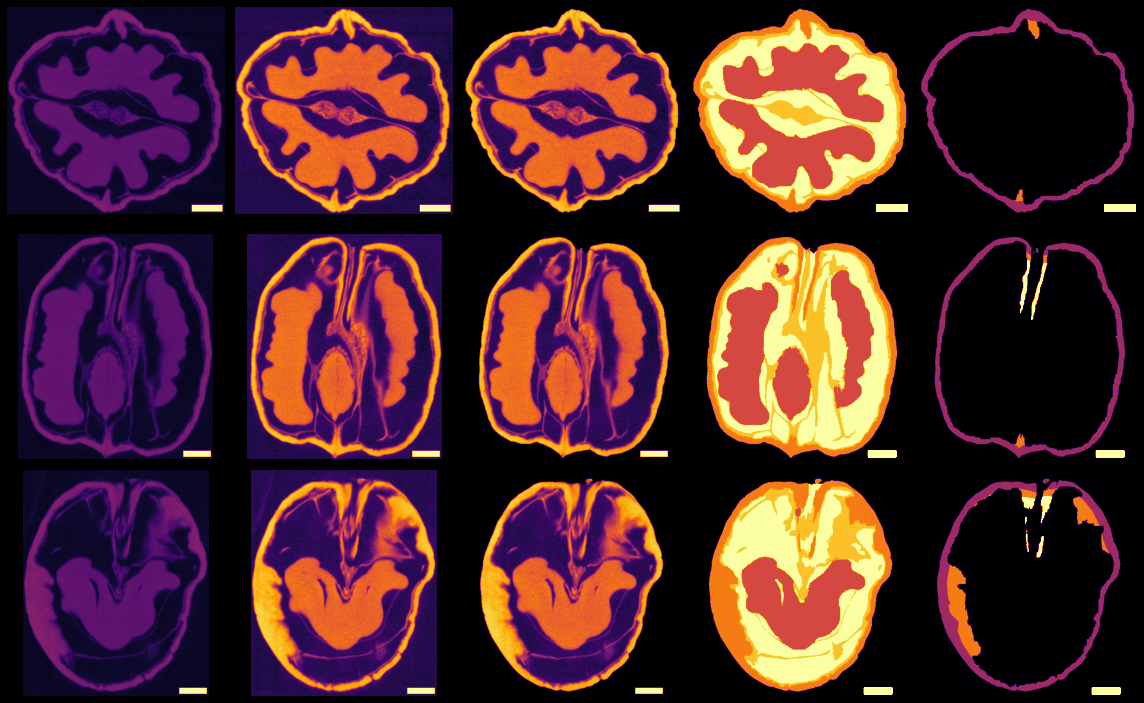

In [95]:
k = 240
fig, ax = plt.subplots(3,5,figsize=(16,10), sharex=False, sharey=False, facecolor='k')
ax = np.atleast_1d(ax).flatten()

i = 0
ss = np.s_[k,:,:]
bar = np.s_[-20:-5, -72:-5]

traw = raw[ss].copy(); traw[bar] = 255
ax[i].imshow(traw, cmap='inferno', vmax=255, vmin=0); i += 1
tnorm = norm[ss].copy(); tnorm[bar] = 255
ax[i].imshow(tnorm, cmap='inferno', vmax=255, vmin=0); i += 1
timg = img[ss].copy(); timg[bar] = 255
ax[i].imshow(timg, cmap='inferno', vmax=255, vmin=0); i += 1
twater = watershed[ss].copy(); twater[bar] = 255
ax[i].imshow(twater, cmap='inferno', vmax=7, vmin=0); i += 1
tprot = protrusion[ss].copy(); tprot[bar] = 255
ax[i].imshow(tprot, cmap='inferno', vmax=7, vmin=0); i += 1

ss = np.s_[:,k,:]
traw = raw[ss].copy(); traw[bar] = 255
ax[i].imshow(traw, cmap='inferno', vmax=255, vmin=0); i += 1
tnorm = norm[ss].copy(); tnorm[bar] = 255
ax[i].imshow(tnorm, cmap='inferno', vmax=255, vmin=0); i += 1
timg = img[ss].copy(); timg[bar] = 255
ax[i].imshow(timg, cmap='inferno', vmax=255, vmin=0); i += 1
twater = watershed[ss].copy(); twater[bar] = 255
ax[i].imshow(twater, cmap='inferno', vmax=7, vmin=0); i += 1
tprot = protrusion[ss].copy(); tprot[bar] = 255
ax[i].imshow(tprot, cmap='inferno', vmax=7, vmin=0); i += 1

ss = np.s_[:,:,k]
traw = raw[ss].copy(); traw[bar] = 255
ax[i].imshow(traw, cmap='inferno', vmax=255, vmin=0); i += 1
tnorm = norm[ss].copy(); tnorm[bar] = 255
ax[i].imshow(tnorm, cmap='inferno', vmax=255, vmin=0); i += 1
timg = img[ss].copy(); timg[bar] = 255
ax[i].imshow(timg, cmap='inferno', vmax=255, vmin=0); i += 1
twater = watershed[ss].copy(); twater[bar] = 255
ax[i].imshow(twater, cmap='inferno', vmax=7, vmin=0); i += 1
tprot = protrusion[ss].copy(); tprot[bar] = 255
ax[i].imshow(tprot, cmap='inferno', vmax=7, vmin=0); i += 1

for i in range(len(ax)):
    ax[i].set_aspect('equal')
    ax[i].axis('off')
#fig.suptitle(fname, fontsize=25);
fig.tight_layout();

#fig.suptitle(fname, fontsize=25, color='w')
fig.tight_layout()

filename = wdst + fname + '_t_{:04d}'.format(k)
plt.savefig(filename + '.jpg', format='jpg', bbox_inches='tight', dpi=152, pil_kwargs={'optimize':True})
#plt.close()

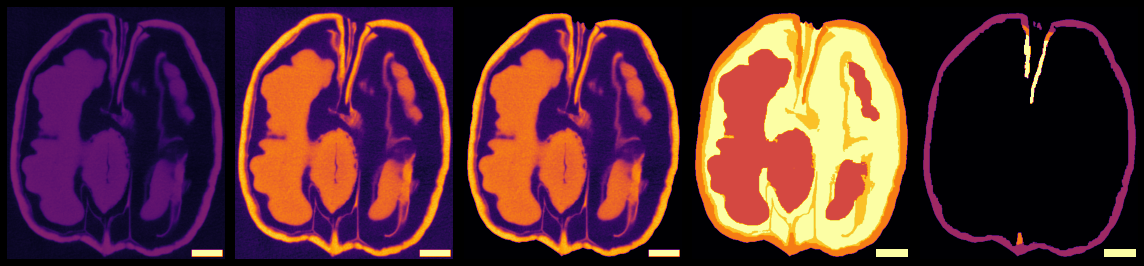

In [90]:
k = 250
ss = np.s_[:,k,:]
bar = np.s_[-20:-5, -72:-5]

fig, ax = plt.subplots(1,5,figsize=(16,8), facecolor='k')
i = 0
traw = raw[ss].copy(); traw[bar] = 255
ax[i].imshow(traw, cmap='inferno', vmax=255, vmin=0); i += 1

tnorm = norm[ss].copy(); tnorm[bar] = 255
ax[i].imshow(tnorm, cmap='inferno', vmax=255, vmin=0); i += 1

timg = img[ss].copy(); timg[bar] = 255
ax[i].imshow(timg, cmap='inferno', vmax=255, vmin=0); i += 1

twater = watershed[ss].copy(); twater[bar] = 255
ax[i].imshow(twater, cmap='inferno', vmax=7, vmin=0); i += 1

tprot = protrusion[ss].copy(); tprot[bar] = 255
ax[i].imshow(tprot, cmap='inferno', vmax=7, vmin=0); i += 1

for i in range(len(ax)):
    ax[i].set_aspect('equal')
    ax[i].axis('off')
#fig.suptitle(fname, fontsize=25);
fig.tight_layout();